<p style="font-family: Arial; font-size:2.5em;color:purple; font-style:bold"><br/>
商丘师范学院网络爬虫
</p>

----------------------------

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold">
冰山
</p>

- 最终看到的结果（程序）只是浮出海面上的部分
- 开发探索的过程是海面之下的部分
- 今天我们将看到冰山的全貌

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold">
鸟瞰整个森林
</p>

- 互联网（Internet）
  - TCP/IP协议
- 万维网（World Wide Web）
  - 超文本传输协议（HTTP）
  - 超文本标记语言（HTML）
  - 统一资源定位符（URL）

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold">
访问一个网页时发生了什么？
</p>

[商丘师范学院学校要闻](http://www.sqnu.edu.cn/index/xxyw.htm)

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold">
浏览器开发者工具
</p>

- Chrome
- Firefox

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold">
Python和网络爬虫
</p>

- [Requests](http://python-requests.org)
  - 使用HTTP协议发送网络请求，接收响应


- [BeautifulSoup](http://www.crummy.com/software/BeautifulSoup/bs4/)
  - 从HTML文档中抽取数据

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold">
导入**Requests**和**BeautifulSoup**
</p>

In [ ]:
import requests
import bs4

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold">
获取学校要闻列表页
</p>

In [ ]:
response = requests.get('http://www.sqnu.edu.cn/index/xxyw.htm')

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold">
查看响应状态
</p>

HTTP状态码

In [ ]:
response.status_code

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold">
设置响应内容文本的字符编码
</p>

In [ ]:
response.encoding = 'utf-8'

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold">
查看响应的内容
</p>

- 一共有多少个字符？
- 打印前100个字符

In [ ]:
len(response.text)

In [ ]:
print(response.text[0:100])

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold">
HTML文档是一棵由标签构成的树
</p>

- 通过浏览器的开发者工具查看
- 使用 **Beautiful Soup** 从中提取数据

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold">
创建BeautifulSoup对象
</p>

用来表示整个HTML文档

In [ ]:
soup = bs4.BeautifulSoup(response.text, 'lxml')

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold">
学校要闻页面的文档结构
</p>

- html
  - body
    - div
      - div
        - div
          - ul
            - li
              - a

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold">
提取翻页列表标签
</p>

In [23]:
fylb_tag = soup.find("ul", class_="fylb")
type(fylb_tag)

bs4.element.Tag

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold">
提取文章的超链接的列表
</p>

In [24]:
a_list = fylb_tag.find_all('a')

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold">
查看第一篇文章的相对URL
</p>

In [25]:
a_list[0]['href']

'../info/1010/9424.htm'

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold">
组装第一篇文章的完整URL
</p>

In [28]:
from urllib.parse import urljoin
first_url = urljoin(response.url, a_list[0]['href'])
first_url

'http://www.sqnu.edu.cn/info/1010/9424.htm'

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold">
发送请求，获取第一篇文章
</p>

In [48]:
first_response = requests.get(first_url)
first_response.status_code

200

In [49]:
first_response.encoding = 'utf-8'
first_soup = bs4.BeautifulSoup(first_response.text, 'lxml')

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold">
分析具体文章页面的文档结构
</p>

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold">
标题
</p>
- html
  - body
    - div
      - form
        - div
          - div
            - h2

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold">
内容
</p>
- html
  - body
    - div
      - form
        - div
          - div
            - div
              - div

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold">
尝试获取标题
</p>

In [57]:
first_title = first_soup.find('h2', class_='title_wz')
first_title_str = str(first_title.string).strip()
first_title_str

'我校获批河南省硕士立项建设单位'

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold">
尝试获取内容
</p>

In [58]:
first_content = first_soup.find('div', id='vsb_content_4')
p_list = first_content.contents

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold">
第一段内容
</p>

In [60]:
p_list[0].string

'近日，由河南省教育厅、河南省发展和改革委员会、河南省财政厅联合下发的《关于印发河南省新增博士硕士学位授予单位立项建设规划的通知》（教研[2018]157号）,商丘师范学院获批硕士学位授予立项建设单位。'

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold">
将所有内容段落连接起来
</p>

In [66]:
ls = []
for p in p_list:
    s = str(p.string).strip()
    if s != '':
        ls.append(s)
first_content_str = ' '.join(ls)
first_content_str

'近日，由河南省教育厅、河南省发展和改革委员会、河南省财政厅联合下发的《关于印发河南省新增博士硕士学位授予单位立项建设规划的通知》（教研[2018]157号）,商丘师范学院获批硕士学位授予立项建设单位。 本次获批硕士学位立项建设单位是省学位委员会根据《国务院学位委员会关于印发<博士硕士学位授权审核办法>的通知》（学位〔2017〕9号）和《国务院学位委员会关于开展2017年博士硕士学位授权审核工作的通知》（学位〔2017〕12号）要求，结合国家和河南省经济社会以及河南省学位与研究生教育发展需求，经学校申报、核查公示、专家评议、省学位委员会审议表决等环节最终确定。全省本次共有11所高校获批硕士学位立项建设单位。 获批此次硕士学位立项建设单位，是学校发展的重大机遇，对提升我校的核心竞争力，加快我校应用型大学建设的步伐具有非常重大的意义。今后，学校将凝心聚力，按照国务院学位委员会新增硕士单位基本条件要求，研究制订立项建设规划方案，不断优化学科结构，推进我校硕士专业学位授权单位建设，实现办学层次的重大突破。 （科研处供稿）'

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold">
获取一篇文章定义为一个函数
</p>

将获取一篇文章的标题和内容的代码封装为一个函数，便于后面作为一个整体使用

In [94]:
def get_article(url):
    response = requests.get(url)
    if response.status_code != 200:
        return ''
    response.encoding = 'utf-8'
    soup = bs4.BeautifulSoup(response.text, 'lxml')
    title = soup.find('h2', class_='title_wz')
    title_str = str(title.string).strip()
    content = soup.find('div', id='vsb_content_4')
    p_list = content.contents
    ls = []
    for p in p_list:
        s = str(p.string).strip()
        if s != '':
            ls.append(s)
    content_str = ' '.join(ls)
    return title_str + ' ' + content_str

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold">
测试一下get_article函数
</p>

In [70]:
get_article(first_url)

'我校获批河南省硕士立项建设单位 近日，由河南省教育厅、河南省发展和改革委员会、河南省财政厅联合下发的《关于印发河南省新增博士硕士学位授予单位立项建设规划的通知》（教研[2018]157号）,商丘师范学院获批硕士学位授予立项建设单位。 本次获批硕士学位立项建设单位是省学位委员会根据《国务院学位委员会关于印发<博士硕士学位授权审核办法>的通知》（学位〔2017〕9号）和《国务院学位委员会关于开展2017年博士硕士学位授权审核工作的通知》（学位〔2017〕12号）要求，结合国家和河南省经济社会以及河南省学位与研究生教育发展需求，经学校申报、核查公示、专家评议、省学位委员会审议表决等环节最终确定。全省本次共有11所高校获批硕士学位立项建设单位。 获批此次硕士学位立项建设单位，是学校发展的重大机遇，对提升我校的核心竞争力，加快我校应用型大学建设的步伐具有非常重大的意义。今后，学校将凝心聚力，按照国务院学位委员会新增硕士单位基本条件要求，研究制订立项建设规划方案，不断优化学科结构，推进我校硕士专业学位授权单位建设，实现办学层次的重大突破。 （科研处供稿）'

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold">
处理一个文章列表页面，定义为函数
</p>

将获取一个列表页的所有文章的代码封装为函数，便于后面作为整体使用。

In [104]:
def get_soup(response):
    if response.status_code != 200:
        return None
    soup = bs4.BeautifulSoup(response.text, 'lxml')
    soup.encoding = 'utf-8'
    return soup

def get_list_page(soup):
    article_list = []
    fylb_tag = soup.find("ul", class_="fylb")
    a_list = fylb_tag.find_all('a')
    for a in a_list:
        article_url = urljoin(response.url, a['href'])
        print(article_url)    # 用于调试
        article = get_article(article_url)
        article_list.append(article)
    return article_list

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold">
测试一下get_list_page函数
</p>

获取学校要闻第一页列表的所有文章标题和内容。

In [105]:
response = requests.get('http://www.sqnu.edu.cn/index/xxyw.htm')
soup = get_soup(response)

In [95]:
first_page = get_list_page(soup)

http://www.sqnu.edu.cn/info/1010/9436.htm
http://www.sqnu.edu.cn/info/1010/9431.htm
http://www.sqnu.edu.cn/info/1010/9430.htm


AttributeError: 'NoneType' object has no attribute 'contents'

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold">
除虫（debug）是写程序过程的一部分
</p>

让我们看一下出了什么问题。

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold">
检查出错页面的文档结构
</p>

原来这篇文章的相关标签id为vsb_content，而不是vsb_content_4。

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold">
修改get_article函数
</p>

In [96]:
def get_article(url):
    response = requests.get(url)
    if response.status_code != 200:
        return ''
    response.encoding = 'utf-8'
    soup = bs4.BeautifulSoup(response.text, 'lxml')
    title = soup.find('h2', class_='title_wz')
    title_str = str(title.string).strip()
    content = soup.find('div', id='vsb_content_4')
    if not content:
        content = soup.find('div', id='vsb_content')
    p_list = content.contents
    ls = []
    for p in p_list:
        s = str(p.string).strip()
        if s != '':
            ls.append(s)
    content_str = ' '.join(ls)
    return title_str + ' ' + content_str

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold">
重新测试get_list_page函数
</p>

In [97]:
first_page = get_list_page(soup)

http://www.sqnu.edu.cn/info/1010/9436.htm
http://www.sqnu.edu.cn/info/1010/9431.htm
http://www.sqnu.edu.cn/info/1010/9430.htm
http://www.sqnu.edu.cn/info/1010/9424.htm
http://www.sqnu.edu.cn/info/1010/9418.htm
http://www.sqnu.edu.cn/info/1010/9412.htm
http://www.sqnu.edu.cn/info/1010/9411.htm
http://www.sqnu.edu.cn/info/1010/9427.htm
http://www.sqnu.edu.cn/info/1010/9407.htm
http://www.sqnu.edu.cn/info/1010/9404.htm


<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold">
获取下一列表页的地址
</p>

In [107]:
def get_next_page_url(response, soup):
    a = soup.find('a', class_='Next')
    return urljoin(response.url, a['href'])

In [108]:
get_next_page_url(response, soup)

'http://www.sqnu.edu.cn/index/xxyw/192.htm'

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold">
获取前n页的文章信息
</p>

In [110]:
def get_articles(start_url, n):
    articles = []
    list_url = start_url
    for i in range(n):
        response = requests.get(list_url)
        soup = get_soup(response)
        articles.extend(get_list_page(soup))
        list_url = get_next_page_url(response, soup)
    return articles

In [112]:
article_list = get_articles('http://www.sqnu.edu.cn/index/xxyw.htm', 10)

http://www.sqnu.edu.cn/info/1010/9436.htm
http://www.sqnu.edu.cn/info/1010/9431.htm
http://www.sqnu.edu.cn/info/1010/9430.htm
http://www.sqnu.edu.cn/info/1010/9424.htm
http://www.sqnu.edu.cn/info/1010/9418.htm
http://www.sqnu.edu.cn/info/1010/9412.htm
http://www.sqnu.edu.cn/info/1010/9411.htm
http://www.sqnu.edu.cn/info/1010/9427.htm
http://www.sqnu.edu.cn/info/1010/9407.htm
http://www.sqnu.edu.cn/info/1010/9404.htm
http://www.sqnu.edu.cn/info/1010/9404.htm
http://www.sqnu.edu.cn/info/1010/9396.htm
http://www.sqnu.edu.cn/info/1010/9393.htm
http://www.sqnu.edu.cn/info/1010/9399.htm
http://www.sqnu.edu.cn/info/1010/9398.htm
http://www.sqnu.edu.cn/info/1010/9378.htm
http://www.sqnu.edu.cn/info/1010/9375.htm
http://www.sqnu.edu.cn/info/1010/9373.htm
http://www.sqnu.edu.cn/info/1010/9372.htm
http://www.sqnu.edu.cn/info/1010/9369.htm
http://www.sqnu.edu.cn/info/1010/9366.htm
http://www.sqnu.edu.cn/info/1010/9365.htm
http://www.sqnu.edu.cn/info/1010/9362.htm
http://www.sqnu.edu.cn/info/1010/9

In [115]:
article_list = ls

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold">
将所有文章拼接起来，并分割为词条
</p>

In [117]:
import jieba

In [124]:
text = ' '.join(article_list)
 
word_list = []
for word in jieba.cut(text):
    w = word.strip()
    if w != 'None':
        word_list.append(w) 
len(word_list)

61756

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold">
绘制词云
</p>

In [122]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

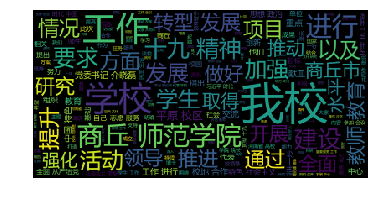

In [127]:
words = ' '.join(word_list)
wc = WordCloud(font_path='yahei.ttf').generate(words)
plt.imshow(wc)
plt.axis("off")
plt.show()